In [140]:
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from networkx.algorithms import community

In [262]:
homophily = "b2.5"
Filename = f"a2_b2.5_g2.1_e2_1_bound_3_frac_0.2_1"
#Filename = f"a3_b3_g2.1_e2_1.0_1"

data = np.loadtxt(f'D:\Daten mit Änderungen\Physik\Bachelorarbeit\Generated_Data\Bound\{homophily}\{Filename}.csv', delimiter=',')
#data = np.loadtxt(f'D:\Daten mit Änderungen\Physik\Bachelorarbeit\Generated_Data\{Filename}.csv', delimiter=',')

data_net = data[len(data)-2:,:]

In [263]:
def Calc_Dists( G, node ):
    dists = np.empty( len(G.nodes) )
    # Calculate opinion distances between node and the other nodes of the graph
    for i in G.nodes:
        dist = np.sqrt( (G.nodes[i]['op1'] - G.nodes[node]['op1'])**2 + (G.nodes[i]['op2'] - G.nodes[node]['op2'])**2 )
        dists[i] = dist

    return dists

def Plot_Opinion_Distribution_2d(data1, data2, data_act):
    op1_list = data1
    op2_list = data2

    fig, ax = plt.subplots(1,3, figsize=(12,4))
    ax[0].set_title("Topic 1")
    ax[0].set_xlabel("Opinion")
    ax[0].set_ylabel("# of Opinions on Topic 1")
    ax[0].hist(op1_list, bins=120)
    ax[1].set_title("Topic 2")
    ax[1].set_xlabel("Opinion")
    ax[1].set_ylabel("# of Opinions on Topic 2")
    ax[1].hist(op2_list, bins=120)
    ax[2].set_title("Opinion-Space")
    ax[2].set_xlabel("Opinion 1")
    ax[2].set_ylabel("Opinion 2")
    ax[2].scatter(op1_list, op2_list, c=data_act, cmap='cool', marker = '2')
    plt.show()

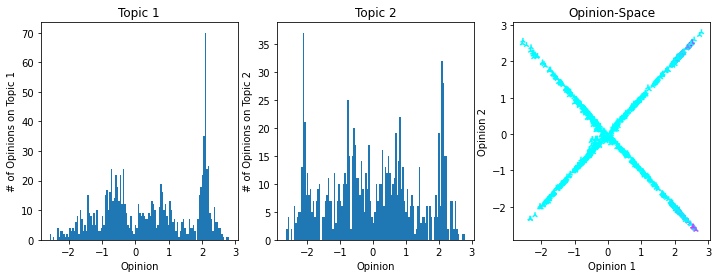

In [264]:
# Creating Graph from final outcome of the Opinion Dynamics
G = nx.Graph()
N = len(data_net[0])
for i in range (N):
    G.add_nodes_from([ (i, {'op1': data_net[0][i], 'op2': data_net[1][i]}) ])


# Adding edges between two nodes when their distance is below the threshhold
thresh = 0.35

for i in range (N):
    dists = Calc_Dists(G,i)
    #print(dists)
    for j in range (N):
        if dists[j] == 0:
            continue
        if dists[j] <= thresh:
            G.add_edge(i, j)
        
Plot_Opinion_Distribution_2d(data[len(data)-2], data[len(data)-1], data[0])

In [265]:
len(G.edges)

33845

In [266]:
partitions = community.greedy_modularity_communities(G)
#sorted(map(sorted, top_level_communities))

In [267]:
print(partitions)
print(len(partitions))
for i in range (len(partitions)):
    print(f"len(Community {i+1}): {len(partitions[i])}")

[frozenset({0, 3, 5, 7, 10, 11, 12, 13, 17, 18, 22, 26, 29, 31, 33, 34, 35, 36, 38, 40, 46, 47, 51, 52, 54, 56, 62, 65, 70, 73, 75, 77, 78, 82, 83, 84, 88, 91, 93, 97, 98, 100, 102, 103, 106, 107, 110, 114, 116, 117, 118, 119, 120, 121, 125, 127, 129, 130, 133, 136, 139, 142, 144, 146, 149, 154, 155, 158, 161, 165, 168, 169, 171, 174, 177, 178, 179, 188, 189, 191, 193, 195, 196, 197, 199, 200, 204, 205, 207, 208, 211, 212, 215, 219, 220, 221, 222, 224, 225, 235, 236, 238, 240, 241, 242, 246, 248, 251, 252, 254, 255, 256, 259, 260, 263, 265, 267, 272, 275, 278, 281, 282, 284, 289, 292, 293, 294, 306, 309, 311, 315, 317, 320, 323, 328, 329, 331, 338, 339, 340, 342, 348, 350, 351, 354, 359, 361, 363, 364, 365, 369, 371, 374, 376, 377, 382, 385, 391, 396, 399, 402, 405, 406, 409, 411, 412, 418, 419, 420, 424, 431, 432, 433, 435, 439, 440, 441, 445, 446, 448, 449, 450, 452, 453, 460, 462, 467, 471, 474, 475, 478, 480, 481, 483, 484, 487, 488, 490, 491, 494, 495, 496, 499, 500, 501, 502, 503